
# Project: Investigate a Dataset - [TMDb movie-data]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset contains information about around 10000 movies collected from The Movie Database (TMDb) from Kaggle.
There is single table which contains 21 columns:

- **id :** The column of unique identifier.
- **imdb_id :** identifier in the movie dtabase.
- **popularity :** Thepopularity of the film.
- **budget :** The budget of the movie.
- **revenue :** The revenue of the movie.
- **original_title :** The movie's title.
- **cast :** The mains characters of the movie.
- **homepage :** The website of the movie.
- **director :** The director of the movie.
- **tagline :** The slogan of the film.
- **keywords :** Some keywords relative to the movie.
- **overview :** A brief summary of the movie.
- **runtime :** The duration in minutes of the movie.
- **genres :** The kind of the movie : romance, police, action ,....
- **production_companies :** The movie production house.
- **release_date :** The date in which the movie has been released.
- **vote_count :** The number of vote.
- **vote_average :** The average note given by the voters.
- **release_year :** The year in which the movie has been released.
- **budget_adj :** The budget of the movie in terms of 2010 dollars, accounting for inflation over time.
- **revenue_adj :** The revenue of the movie in terms of 2010 dollars, accounting for inflation over time.

### Question(s) for Analysis

##### Question 1: Which genres are most popular from year to year ?

##### Question 2: What kinds of properties are associated with movies that have high revenues ?

##### Question 3: Which genres of movie make more profit ?

 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns

%matplotlib inline

In [2]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

Requirement already up-to-date: pandas==0.25.0 in /opt/conda/lib/python3.6/site-packages (0.25.0)


<a id='wrangling'></a>
## Data Wrangling


### General Properties


In [3]:
# Let's load the data
movie_df = pd.read_csv("tmdb-movies.csv")

#Print the 5 first lines
movie_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
# Let's check the shape of our dataframe
movie_df.shape

(10866, 21)

Our dataset contains then **10866** rows and **21** columns

In [5]:
# Type of each columns
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We could see that datetime is not in the correct type and that some columns have missing values

In [6]:
# Stats of our dataset
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning


In [7]:
# Number of rows duplicated

sum(movie_df.duplicated())

1

In [8]:
# Drop duplicated rows 

movie_df.drop_duplicates(inplace=True)
movie_df.shape

(10865, 21)

**1** row was duplicated, we have droped it and then we have 10865 rows and always 21 columns.

In [9]:
# Drop useless columns

movie_df.drop(["imdb_id","homepage", "overview", "tagline", "keywords", "revenue_adj", "budget_adj"] , axis=1, inplace=True)
movie_df.shape

(10865, 14)

Some columns are useless and will not help us or will not be implicated in our investigation through questions we have posed above.

For example imdb_id is useless once id column can be our identifier.

Homepage, overview, keywords, revenue_adj, budget_adj, are not useful for this analysis through the questions we must answer.

We have now 14 columns

In [10]:
# Correct release_date type
movie_df["release_date"] = pd.to_datetime(movie_df["release_date"])

# Let's check
movie_df.dtypes

id                               int64
popularity                     float64
budget                           int64
revenue                          int64
original_title                  object
cast                            object
director                        object
runtime                          int64
genres                          object
production_companies            object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
dtype: object

We have corrected release_date value type from object to datetime

In [11]:
# Drop rows where budget or revenue is 0, surely due to lack of information

movie_df = movie_df[movie_df["budget"] > 0]
movie_df = movie_df[movie_df["revenue"] > 0]

movie_df.shape

(3854, 14)

We have droped all the rows which has 0 as value of budget or revenue, because they represents rows with lack of infromation. Indeed budget or revenue could not be equal to 0

We have now **3854** rows and **14** columns

In [12]:
# Number of missing values per columns
movie_df.isna().sum()

id                       0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     4
director                 1
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
dtype: int64

In [13]:
# Drop rows with misssing values

movie_df.dropna(inplace = True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3805 entries, 0 to 10848
Data columns (total 14 columns):
id                      3805 non-null int64
popularity              3805 non-null float64
budget                  3805 non-null int64
revenue                 3805 non-null int64
original_title          3805 non-null object
cast                    3805 non-null object
director                3805 non-null object
runtime                 3805 non-null int64
genres                  3805 non-null object
production_companies    3805 non-null object
release_date            3805 non-null datetime64[ns]
vote_count              3805 non-null int64
vote_average            3805 non-null float64
release_year            3805 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(6), object(5)
memory usage: 445.9+ KB


Some rows have missing values in some columns. We have to delete it to have a better dataset

- The dataset is now cleaned : Missing values, duplicated rows and rows with uncomplete datas have been removed.
- Useless columns which will not serve us in this investigation have been removed 
- And uncorrect datas types have been corrected

Let's explore now !

<a id='eda'></a>
## Exploratory Data Analysis

### Question 1 : Which genres are most popular from year to year ?

This question takes into account threee features : 
- Genres
- Popularity
- Release_year

We will explore and sometimes, visualize single features , after relation between popularity and genres and finally the relation between the three features for answering the question

In [14]:
# Split values for genres column
movie_df['genres'] = movie_df['genres'].apply(lambda x: str(x).split('|'))

# Check if values are been well splited to list
movie_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,"[Action, Adventure, Science Fiction, Thriller]",Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,"[Action, Adventure, Science Fiction, Thriller]",Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015


In [15]:
# Explode values to have one row, one genre 
movie_df = movie_df.explode(column="genres")

#New shape for our dataset 
movie_df.shape

(10180, 14)

We have noticed that genres column value are separated by |.

So for a better visualisation, we have splitted each value column so we have for each row a single value of Genre.

Number of rows naturally increased

In [16]:
# Number of movies per genre value
movie_df["genres"].value_counts()

Drama              1729
Comedy             1335
Thriller           1194
Action             1076
Adventure           743
Romance             658
Crime               649
Science Fiction     517
Horror              459
Family              417
Fantasy             395
Mystery             343
Animation           199
Music               131
History             128
War                 119
Western              52
Documentary          26
Foreign               9
TV Movie              1
Name: genres, dtype: int64

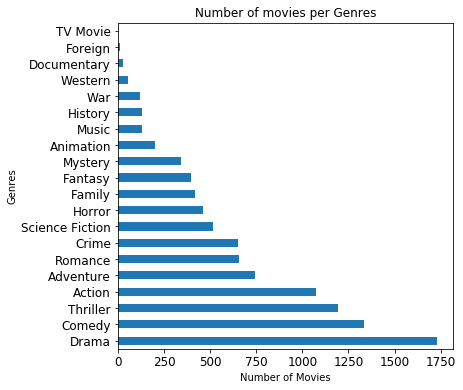

In [25]:
# Visualisation
ax_subplot = movie_df["genres"].value_counts().plot(kind='barh',figsize=(6,6), fontsize=12, title="Number of movies per Genres");
ax_subplot.set_xlabel("Number of Movies");
ax_subplot.set_ylabel("Genres");

Above is a visualization fo number of movies produced per each genres value.

- Drama is the most represented while
- TV Movie and Foreign are the least represented

Let's see now a description for popularity feature

In [26]:
movie_df["popularity"].describe()

count    10180.000000
mean         1.274476
std          1.613311
min          0.010335
25%          0.487399
50%          0.856329
75%          1.470711
max         32.985763
Name: popularity, dtype: float64

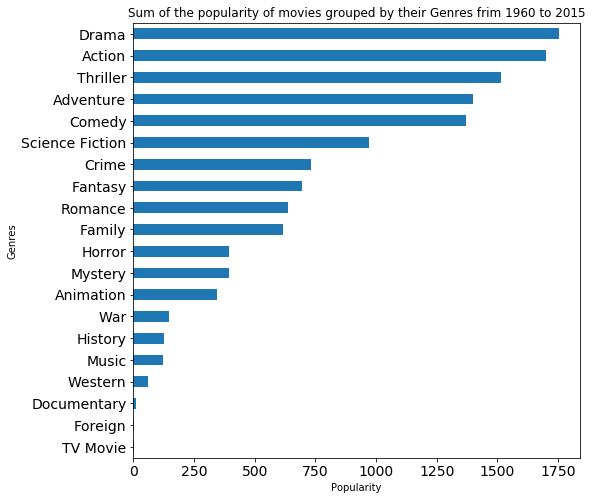

In [29]:
# Visualize genres of movie and the sum of their popularity since 1960 to 2015

ax = movie_df.groupby("genres")["popularity"].sum().sort_values().plot(kind = 'barh',title = "Sum of the popularity of movies grouped by their Genres frim 1960 to 2015", figsize=(8,8), fontsize=14, sort_columns=False);
ax.set_xlabel("Popularity");
ax.set_ylabel("Genres");

The previous chart show us the popularity of movie per genres since 1960 to 2015
- Drama's movies and action's movie are the most popular films since 1960
- Documentary , Foreign and TV movie are the least popular ones

Now we will see the genres of movies which are more popular over year to year. We'll then consider the release_year feature

In [31]:
# Genres with the mean of popularity per year
genres_year_meanPopularity = movie_df.groupby(["genres", "release_year"], as_index=False)["popularity"].mean()
genres_year_meanPopularity.head()

,genres,release_year,popularity
0,Action,1960,1.504538
1,Action,1961,0.464139
2,Action,1962,1.848380
3,Action,1963,1.357698
4,Action,1964,3.153791


This dataframe present the mean of popularity for each genre for each year since 1960 to 2015

We could stop on this dataframe and try to visualize the relation between those features, but the shape and the form of this dataframe will not permit us to visualize correctly the evolution of the popularity over year to year and find out the genres which are more popular over year to year

In [32]:
# List of all values for genres features
allGenres = movie_df["genres"].unique()

# Create a pseudo dataframe with genres as index and year as columns 
popular_genres_df = pd.DataFrame(index = allGenres, columns = np.arange(1960, 2016))

#Fill our dataframe with 0 waiting to fill it with the corresponding popularity value
popular_genres_df.fillna(0, inplace=True)
popular_genres_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Adventure,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Science Fiction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Thriller,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Fantasy,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Crime,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Western,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Drama,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Family,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Animation,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


This form is more adapted for a complete and a better visualization. 

Now let's fill each cell with the corresponding value using **genres_year_meanPopularity** dataframe

In [33]:
for i in allGenres:
    k = 0
    genre_year = genres_year_meanPopularity.query('genres == "{}"'.format(i))["release_year"]
    for j in genre_year:
        popular_genres_df.loc[i,j] = genres_year_meanPopularity["popularity"][k]
        k+=1

popular_genres_df

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Action,1.504538,0.464139,1.848380,1.357698,3.153791,1.266311,0.347789,1.338467,0.678138,1.778746,...,1.189849,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119,1.902791,4.005362,5.412644
Adventure,1.504538,0.464139,1.848380,1.357698,3.153791,1.266311,0.347789,1.338467,0.678138,1.778746,...,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119,1.902791,4.005362,5.412644,1.872132
Science Fiction,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.504538,0.000000,0.464139,0.000000,...,1.230245,0.898608,0.977753,1.339254,1.810953,1.352502,1.324182,1.189849,1.270305,1.445200
Thriller,1.504538,0.000000,0.464139,1.848380,1.357698,3.153791,1.266311,0.347789,1.338467,0.678138,...,1.189849,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119,1.902791,4.005362,5.412644
Fantasy,0.000000,0.000000,0.000000,0.000000,1.504538,0.000000,0.000000,0.464139,0.000000,0.000000,...,0.837698,0.935207,1.122515,1.141319,1.070567,1.088277,1.230245,0.898608,0.977753,1.339254
Crime,0.000000,1.504538,0.464139,0.000000,1.848380,0.000000,0.000000,1.357698,3.153791,1.266311,...,1.810953,1.352502,1.324182,1.189849,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119
Western,1.504538,0.464139,1.848380,0.000000,0.000000,0.000000,1.357698,0.000000,3.153791,1.266311,...,1.134663,0.929729,1.424568,0.000000,0.994141,0.894390,0.805102,0.837698,0.935207,1.122515
Drama,1.504538,0.464139,1.848380,1.357698,3.153791,1.266311,0.347789,1.338467,0.678138,1.778746,...,1.270305,1.445200,1.769773,1.553890,1.588119,2.122119,1.902791,4.005362,5.412644,1.872132
Family,0.000000,1.504538,0.000000,0.000000,0.464139,1.848380,0.000000,1.357698,3.153791,0.000000,...,1.088277,1.230245,0.898608,0.977753,1.339254,1.810953,1.352502,1.324182,1.189849,1.270305
Animation,0.000000,1.504538,0.000000,0.000000,0.000000,0.000000,0.000000,0.464139,0.000000,0.000000,...,0.994141,0.894390,0.805102,0.837698,0.935207,1.122515,1.141319,1.070567,1.088277,1.230245


Now, we're going to visualize for each genre, his evolution over year to year and then find out the genres which are more popular over year to year.

In [41]:
# This function will draw a line plot for each genres value.

def draw_line_plot(df, genres, title):
    sns.set_style("whitegrid")
    
    # Make a subplot of 5 rows and 4 columns
    fig, ax = plot.subplots(5,4,figsize = (16,10))
    plot.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

    # Set the title of the subplot.
    fig.suptitle(title,fontsize = 16)
    
    colors = ['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#212529', '#e6beff', '#9a6324', '#191970', '#800000', '#aaffc3', '#808000', '#006400', '#000075', '#FF6347', '#4169E1']
    i=0
    ax_x = 0
    ax_y = 0
    for genre in genres:   
        ax_subplot = df.loc["{}".format(genre)].plot(label = "{}".format(genre),color = colors[i],ax = ax[ax_x][ax_y],legend=True)
        ax_subplot.set_xlabel("Years", labelpad=5)
        ax_subplot.set_ylabel("Popularity", labelpad=10)
        i+=1
        if(ax_y == 3):
            ax_x += 1
            ax_y = 0
        else:
            ax_y+=1

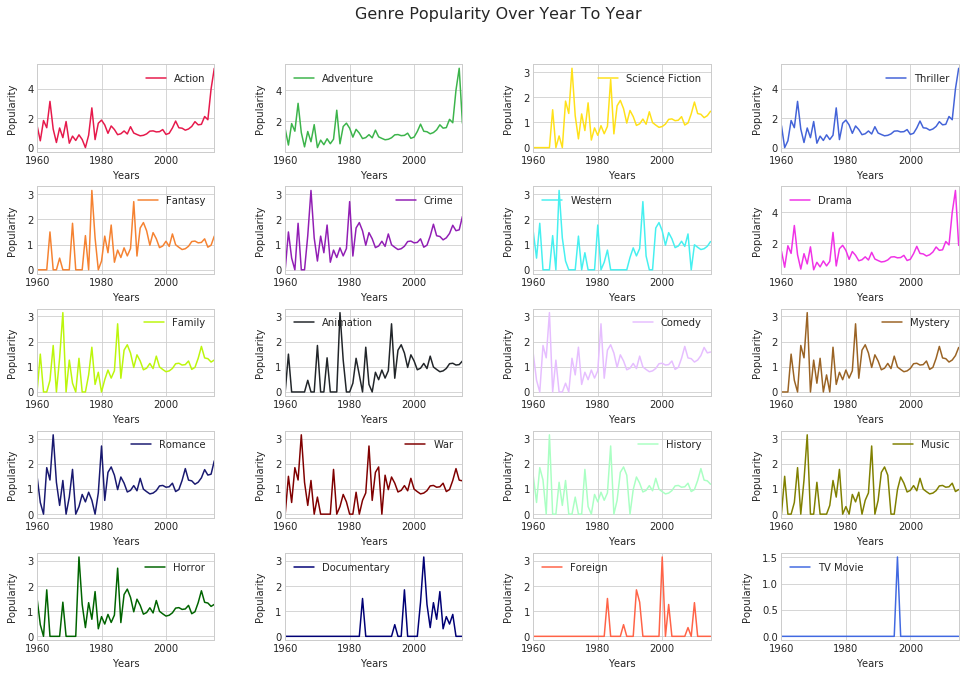

In [42]:
draw_line_plot(popular_genres_df, allGenres, 'Genre Popularity Over Year To Year')


- We can see that for Action and **Thriller** movies, the popularity is skyrocketing since 2008. On the other hand, **Drama** and **Adventure** movies are in free fall since 2010.

- **Documentary** type films had almost zero popularity from 1960 until around 1985 before experiencing great popularity in the years 1985-1987, 1995-1998, 2001-2005 but have since 2010 a low popularity which has been around since 2014 0

- Films of the **War**, **History**, **Music**, **Science Fiction**, **Mystery** type have a medium popularity since 2000

- **Romance**, **Comedy** and **Family**, **Crime** type films have seen a slight rise in popularity since around 2000

- **Horror** movie had a great popularity i years 1970 to 1985 and now it is rather medium 


To sum up and to answer to the question, The movies that are the most popular on average over year to year are mainly  **Action** and **Thriller** movie. 

We could add to **Romance**,**Science Fiction**, **Comedy**, **Crime** and **Drama** even if actually Drama's movie popularity is falling.


### Question 2  What kinds of properties are associated with movies that have high revenues?


We will try to find out the features which have more co-relation with revenue feature

In [43]:
# Draw a scatter plot for revenue feature and each other feature

def draw_corr_plot(df, features, title):
    sns.set_style("whitegrid")
    
    # Make a subplot of two rows and 4 columns.
    fig, ax = plot.subplots(2,4,figsize = (16,10))
    plot.subplots_adjust(right=0.9, wspace=0.4, hspace=0.4)
    
    # Set the title of the subplot.
    fig.suptitle(title,fontsize = 16)
    
    ax_x = 0
    ax_y = 0
    for f in features:
        df.plot(x="revenue", y="{}".format(f), kind="scatter", ax = ax[ax_x][ax_y], legend=True);
        if(ax_y == 3):
            ax_x += 1
            ax_y = 0
        else:
            ax_y+=1
       
    #Draw specially genres scatter plot with revenue because pandas scatter plot lauch error while drawing genres scatter plot with revenues because genres are no numeric values
    ax = ax[1][2]
    ax.scatter(movie_df["revenue"], movie_df["genres"])
    ax.set_xlabel("revenue")
    ax.set_ylabel("genres")    

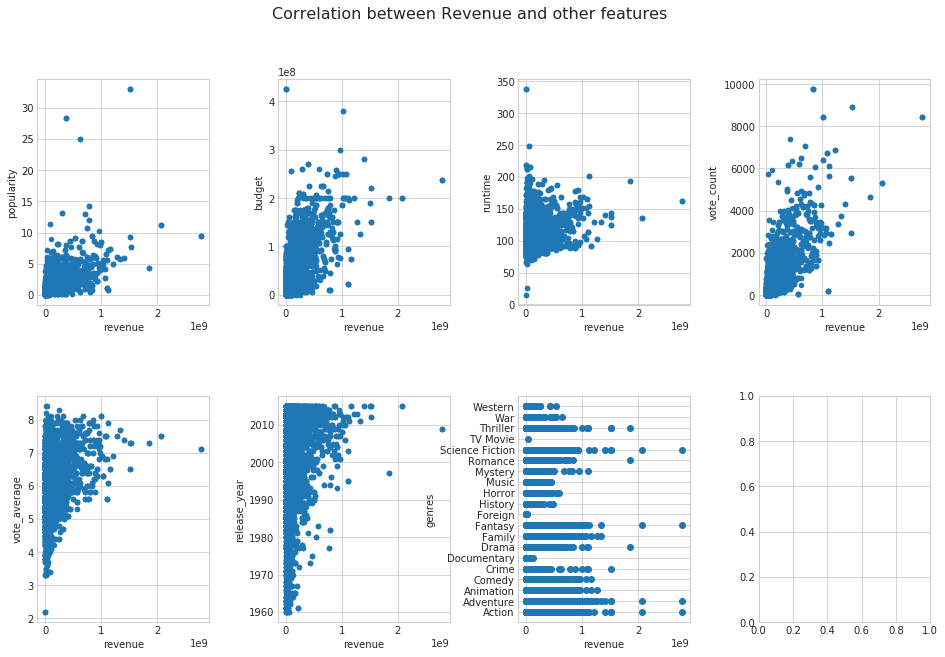

In [44]:
# Let's see the co-relation between features

draw_corr_plot(movie_df, ['popularity', 'budget','runtime', 'vote_count', 'vote_average', 'release_year'],"Correlation between Revenue and other features");

**We have choosen this kind of chart because, the scatterplot is the most useful graph for displaying the relationship between two variables.**

We have choosen to let production_house, director, cast, id, original_title columns after preview the result, we can't get anything good out of it

We could see that features with high correlation with revenue are **budget**, **popularity**, and **vote_count**
- Movies with high budget have more revenue
- Movies with great popularity have also more revenue except a few ones
- Mainly, Movie with high vote_account have also more revenue
- Genres of movie which have more revenue are mainly those of Science-Fiction, Action , Adventure and Fantasy

In summary movies with higher budgets have shown to generate higher revenues.

### Question 3 : Which genres of movie make more profit 

We will fisrtly create another column profit which result from the substract between budget and revenue and after visualize the relation between this new column and the genres of movie

In [45]:
# Create another column which is the difference between the revenue and the budget

profit = np.array(movie_df.revenue - movie_df.budget)

In [46]:
# Add column to the dataframe
movie_df["profit"] = profit

# Let's visualize
movie_df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,228436354


The new column has been added and the corresponding value, filled

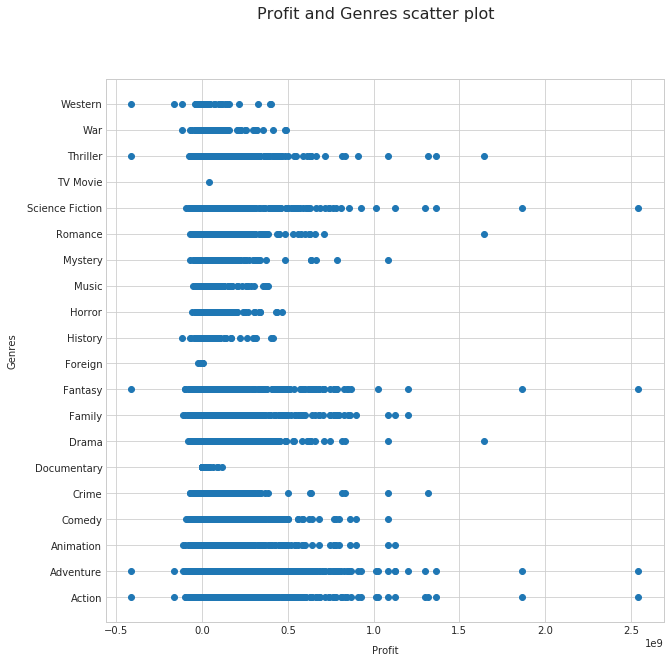

In [53]:
fig, ax = plot.subplots(figsize = (10,10))

fig.suptitle("Profit and Genres scatter plot",fontsize = 16)
ax.scatter(movie_df["profit"], movie_df["genres"]);
plot.xlabel("Profit", labelpad=10);
plot.ylabel("Genres", labelpad=10);

Visualization with a scatter chart.
Each point represent a movie with its corresponding profit and genre.

Now, let's visualize with a bar chart the sum of profit for the movies grouped by their genres to have a better visualization and for an appropriate conclusion

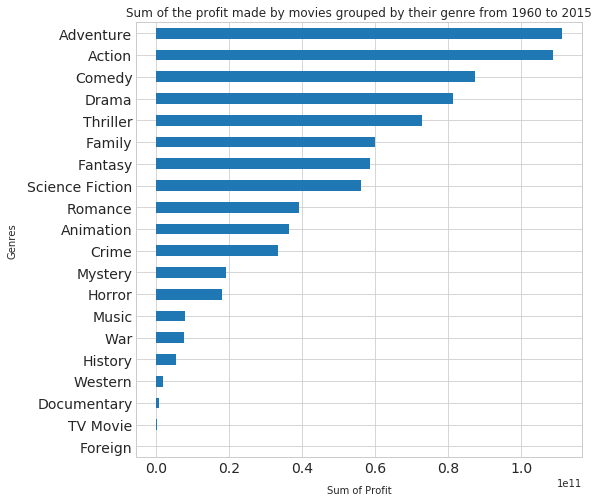

In [56]:
# Bar chart presenting the total profit per genre of movie
ax = movie_df.groupby("genres")["profit"].sum().sort_values().plot(kind='barh', title = "Sum of the profit made by movies grouped by their genre from 1960 to 2015", fontsize=14, figsize=(8,8));
ax.set_xlabel("Sum of Profit", labelpad=10);
ax.set_ylabel("Genres", labelpad=10);

We can see through this visualisation that,  in terms of cumulative profits, since 1960, **Adventure** movies have generated more profit, just followed by **Action's** movie.

Let's see now the genre of Movie which have generated in average more profit

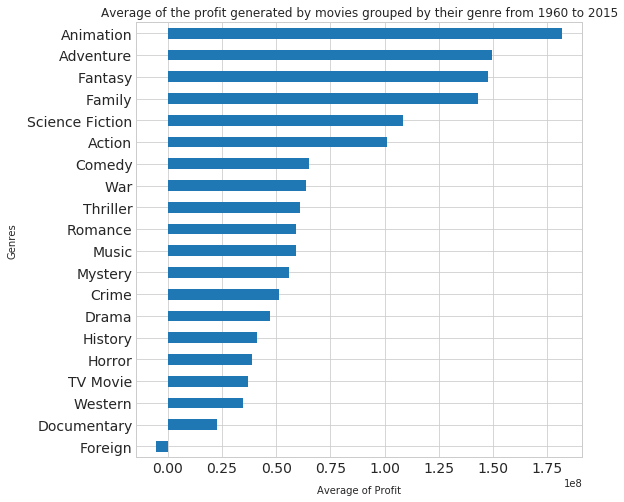

In [59]:
# Bar chart presenting the average profit per genre of movie
ax = movie_df.groupby("genres")["profit"].mean().sort_values().plot(kind='barh', title = "Average of the profit generated by movies grouped by their genre from 1960 to 2015", fontsize=14, figsize=(8,8));
ax.set_xlabel("Average of Profit", labelpad=10);
ax.set_ylabel("Genres", labelpad=10);

In avearge, **Animation's** Movies generate more profit, folllowed by **Adventure**, **Fantasy** and **Family** movies

<a id='conclusions'></a>
## Conclusions

1. 

    The movies that are the most popular in average over year to year are mainly **Action** and **Thriller** movies.
    We could also add **Romance**,**Science Fiction**, **Crime**, **Comedy** and **Drama** movies even if actually Drama's movie popularity is falling.
    This conclusion is based on the average of popularity from 1960 to 2015.
    
    We could expand our analyse and do the same work for different aggregations methods ...
    
    
2. 
    - Movies with high budget have more revenue
    - Movies with great popularity have also more revenue except a few ones
    - Mainly, Movie with high vote_account have also more revenue
    - Genres of movie which have more revenue are mainly those of Science-Fiction, Action , Adventure and Fantasy
   In summary movies with higher budgets have shown to generate higher revenues. 
   We could expand our analyse to other features, but the the co-relation is not so high as those of features we have taken into account
   
   
3. 
    - Since 1960, by accumulating the profits, Adventure movies have generated more profit, just followed by Action's movie.
    - In avearge, Animation's Movies generate more profit, folllowed by Adventure, Fantasy, Family movies from 1960 to 2015

## Limitations

- We were obliged in order to have a very cleaned dataset to remove all rows with zero **budget** or **revenue** which also considerably reduced the size of the data set. If these values are available, this could impact the results obtained in questions 2 and 3


- We were not able to assign a unit of measurement to the **popularity** feature values...this had a little impact on the interpretation of our results


- It is also important to precise that we have use the average of popularity to answer the question 1.Someone else could use another aggregate methods.
   

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0